## Traveling Salesman Problem - Random Sample

### Import Packages

In [1]:
from pyomo.environ import *
import pyomo.environ as pyo
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [2]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of cities
n=100

#Coordinate Range
rangelct=10000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999

df = pd.DataFrame(distancelct)
df.index += 1
df.columns += 1
cij_model=df.stack().to_dict()


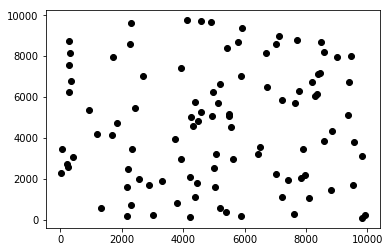

In [3]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Solution Representation and Initial Solution

In [4]:
random.seed(1)
Solution_i=random.sample(list(range(n)), n)

dfSolution_i=pd.DataFrame(Solution_i)
dfSolution_i
dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]


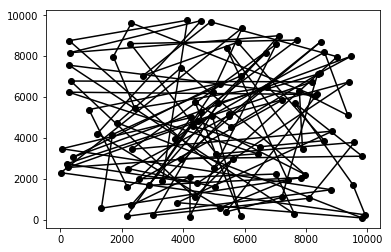

In [5]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])
    
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

In [6]:
#Compute Objective Value
ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
ObjValue

508089.55416686134

### Random Algorithm

In [7]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 

while cputime_i[-1]<60:
    
    iteration=iteration+1
    
    #Random permutation
    Solution_i=random.sample(list(range(n)), n)
    dfSolution_i=pd.DataFrame(Solution_i)
    dfSolution_i
    dflinkindex_p1=dfSolution_i
    dflinkindex_p2=dfSolution_i.shift(-1)
    dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
    linkindex_p1=dflinkindex_p1.to_numpy()
    linkindex_p2=dflinkindex_p2.to_numpy()
    linkindex_p1=linkindex_p1.astype(int)
    linkindex_p2=linkindex_p2.astype(int)
    linkindex_p1=linkindex_p1.transpose()[0]
    linkindex_p2=linkindex_p2.transpose()[0]
    
    #Compute Objective Value
    ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolution=copy.deepcopy(Solution_i)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
        #def connectpoints(x,y,p1,p2):
        #    x1, x2 = x[p1], x[p2]
        #    y1, y2 = y[p1], y[p2]
        #    plt.plot([x1,x2],[y1,y2],'k-')

        #for i_index in range(len(linkindex_p2)): 
        #    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

        #plt.plot(coordlct_x, coordlct_y, 'o', color='black');

        #clear_output(wait=True)
        #plt.draw()
        #plt.pause(0.1)
        #plt.clf()
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

508089.55416686134
508089.55416686134
508089.55416686134
508089.55416686134
508089.55416686134
487018.6675888888
487018.6675888888
487018.6675888888
487018.6675888888
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
477878.6176337704
470379.76276273985
470379.76276273985
470379.76276273985
470379.76276273985
470379.76276273985


447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.841

447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.8413988759
447207.841

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.0705128518
434755.070

429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.833

429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.8333286202
429668.833

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.6340836413
428940.634

### Read output variables

In [8]:
min(Objvalue_list)

428940.6340836413

### Plot results

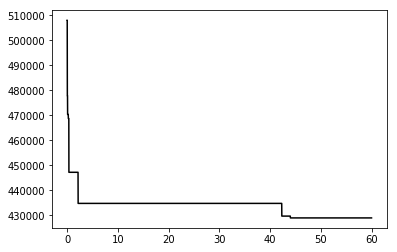

In [9]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

In [10]:
solutiondf=pd.DataFrame(cputime_i[range(len(Objvalue_list))],Objvalue_list)

#solutiondf.to_csv('SolDf_Random500.csv',index=True)

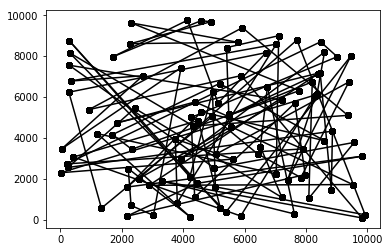

In [11]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');
